# Homework #1

Overall rules:

- Refrain from downloading and loading data from a local file. Instead, obtain all required data using the appropriate API.
- Do not download data in separate parts. For instance, in Q1 where data for 22 countries is necessary, obtain the data in a single, large piece and partition it later on.
- Avoid duplicating code by copying and pasting it from one cell to another. If copying and pasting is necessary, develop a suitable function for the task at hand and call that function.
- When providing parameters to a function, never utilize global variables. Instead, always pass parameters explicitly and always make use of local variables.

Failure to adhere to these guidelines will result in a 25-point deduction for each infraction.

## Q1

For this question, you are going to use [World Bank's Climate Change Knowledge Portal](https://climateknowledgeportal.worldbank.org/).

The Mediterranean Sea is bordered by following 22 countries: Spain, France, Monaco, Italy, Slovenia, Croatia, Bosnia and Herzegovina, Montenegro, Albania, Greece, Turkey, Syria, Lebanon, Israel, Palestine, Egypt, Libya, Tunisia, Algeria, Morocco, Malta, and Cyprus. Using the World Bank's Climate Change Knowledge Portal, obtain the following data through their API:

- Monthly average surface temperatures
- Monthly average precipitation

Gather this information as a time series from 1950 to 2020 for all countries surrounding the Mediterranean Sea. Conduct the following analyses on the retrieved data:

1. Compute the average surface temperature per month for each country, save the results in a pandas data frame called `MAST`, and display the data using a line plot.
2. Compute the average precipitation per month for each country, save the results in a pandas data frame called `MAPR`, and display the data using a line plot.
3. Compute the average surface temperature per annum for each country, save the results in a pandas data frame called `YAST`, and display the data using a line plot.
4. Compute the average precipitation per annum for each country, save the results in a pandas data frame called `YAPR`, and display the data using a line plot.

In [2]:
!pip install --quiet duckdb-engine
import matplotlib.pyplot as plt
import duckdb
import pandas as pd
import numpy as np
from urllib.request import urlopen
import json

In [3]:
with urlopen("https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/ESP,REU,MCO,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,EGY,LBY,TUN,DZA,MAR,MLT,CYP?_format=json") as url:
    json_data = json.load(url)

json_data['data']

{'pr': {'ALB': {'1950-01': 97.35,
   '1950-02': 87.45,
   '1950-03': 57.06,
   '1950-04': 108.63,
   '1950-05': 39.78,
   '1950-06': 23.41,
   '1950-07': 3.25,
   '1950-08': 15.54,
   '1950-09': 44.81,
   '1950-10': 128.6,
   '1950-11': 204.28,
   '1950-12': 225.59,
   '1951-01': 82.91,
   '1951-02': 123.01,
   '1951-03': 133.66,
   '1951-04': 100.62,
   '1951-05': 79.9,
   '1951-06': 63.97,
   '1951-07': 25.22,
   '1951-08': 20.46,
   '1951-09': 29.73,
   '1951-10': 175.11,
   '1951-11': 151.17,
   '1951-12': 99.89,
   '1952-01': 245.64,
   '1952-02': 128.6,
   '1952-03': 65.73,
   '1952-04': 50.8,
   '1952-05': 74.75,
   '1952-06': 22.73,
   '1952-07': 31.58,
   '1952-08': 2.33,
   '1952-09': 53.76,
   '1952-10': 153.24,
   '1952-11': 261.51,
   '1952-12': 250.15,
   '1953-01': 101.72,
   '1953-02': 198.31,
   '1953-03': 13.32,
   '1953-04': 98.23,
   '1953-05': 140.51,
   '1953-06': 76.83,
   '1953-07': 12.72,
   '1953-08': 30.12,
   '1953-09': 31.82,
   '1953-10': 71.34,
   '1953-1

In [4]:
json_data_pr = json_data['data']['pr']
json_data_tas = json_data['data']['tas']

Computed the average surface temperature per month for each country, save the results in a pandas data frame called MAST, and display the data using a line plot.

In [5]:
MAST = pd.DataFrame(json_data_tas)
MAST.index.name= 'Date'
MAST

ALB    BIH    CYP    DZA    EGY    ESP    GRC    HRV    ISR    ITA  \
Date                                                                            
1950-01   0.39  -3.92   9.83  10.01  11.83   4.97   2.60  -1.35   9.35   2.59   
1950-02   4.68   1.36  10.75  12.80  12.59   7.33   6.77   3.51   9.79   5.40   
1950-03   7.35   4.82  13.85  16.29  16.98   9.37   8.60   7.25  14.36   7.71   
1950-04  11.63   9.19  18.01  21.04  23.50  11.02  13.98  10.85  20.61   9.89   
1950-05  16.16  14.71  19.95  26.50  25.64  14.46  17.61  16.95  21.74  15.65   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-08  23.05  20.98  28.54  34.73  31.00  23.34  24.76  23.09  27.92  23.38   
2020-09  20.25  17.06  28.07  31.43  30.18  19.55  22.40  18.57  28.64  19.49   
2020-10  13.81  11.35  24.68  25.51  26.33  13.58  17.33  13.00  25.07  13.26   
2020-11   8.99   6.08  19.03  18.39  18.37  11.24  11.36   7.41  18.39  10.29   
2020-12   7.46   4.27  15.94  14.55  16.35   7.17  10.12   5.42  15.21   6.34   

         ...    LBY    MAR    MCO    MLT    MNE    REU    SVN    SYR    TUN  \
Date     ...                                                                  
1950-01  ...  10.94   8.05   4.70  13.78  -3.41  23.49  -3.14   2.59   8.11   
1950-02  ...  12.07  11.16   7.06  14.09   1.11  23.25   1.67   4.58  10.42   
1950-03  ...  15.12  13.75   8.80  14.23   4.02  22.47   5.80  11.83  12.71   
1950-04  ...  21.44  15.34   9.91  16.27   8.53  21.97   8.33  20.23  16.41   
1950-05  ...  24.62  18.47  15.33  18.84  13.48  19.58  14.92  21.82  22.01   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-08  ...  30.96  28.51  23.06  27.04  20.19  17.84  20.73  30.43  31.06   
2020-09  ...  29.26  25.44  19.75  25.70  17.27  18.48  16.20  30.32  26.62   
2020-10  ...  24.73  19.60  13.88  22.02  10.96  20.24  10.61  23.65  21.20   
2020-11  ...  16.71  15.78  11.72  19.37   6.71  20.46   4.74  14.24  17.02   
2020-12  ...  14.48  11.71   7.42  16.66   4.34  22.58   2.23  10.27  12.55   

           TUR  
Date            
1950-01  -5.39  
1950-02  -2.45  
1950-03   3.96  
1950-04  12.38  
1950-05  14.50  
...        ...  
2020-08  23.26  
2020-09  22.14  
2020-10  16.48  
2020-11   7.21  
2020-12   4.57  

[852 rows x 21 columns]

I created a intetactive line graph to make it more readible.

In [19]:
import plotly.express as px

fig_mast = px.line(MAST, x=MAST.index, y=MAST.columns, title='Average Surface Temperature Per Month')
fig_mast.show()

Computed the average precipitation per month for each country, save the results in a pandas data frame called MAPR, and display the data using a line plot.

In [22]:
MAPR = pd.DataFrame(json_data_pr)

In [23]:
MAPR.index.name= 'Date'
MAPR

ALB     BIH    CYP   DZA   EGY    ESP     GRC     HRV    ISR  \
Date                                                                       
1950-01   97.35   78.33  68.26  9.54  2.65  29.45   86.34   87.53  58.02   
1950-02   87.45   87.53  30.95  3.24  1.60  57.43   59.23   78.08  37.63   
1950-03   57.06   81.82  54.18  5.26  0.90  37.33   90.62   48.30  30.46   
1950-04  108.63   85.88  32.61  5.48  0.94  33.08   67.39   98.04   5.36   
1950-05   39.78   33.80  34.12  4.34  1.22  71.20   42.14   19.68   6.65   
...         ...     ...    ...   ...   ...    ...     ...     ...    ...   
2020-08   57.18  119.86   0.70  1.41  0.13  28.52   34.55  125.63   1.72   
2020-09  113.53   85.74   1.62  4.49  0.22  41.17   52.62   94.17   1.32   
2020-10  185.30  147.62   2.31  1.36  0.50  70.78   47.51  171.13   1.06   
2020-11   12.27   34.98  97.35  4.55  2.76  71.89   35.34   42.62  43.54   
2020-12  201.66  177.84  74.32  6.36  1.01  74.47  154.60  166.63  27.34   

            ITA  ...   LBY    MAR     MCO     MLT     MNE     REU     SVN  \
Date             ...                                                        
1950-01   72.88  ...  6.46  32.07   28.89  103.62  107.09  249.40   85.96   
1950-02   82.85  ...  3.04   6.46  103.63   84.78  135.64  115.32   85.20   
1950-03   42.86  ...  2.31  10.20   48.47   55.22   73.45  177.42   35.55   
1950-04  115.70  ...  0.53  15.54   88.26   26.42  133.90  214.87  152.15   
1950-05   44.61  ...  1.59  17.88   46.76    3.61   52.71   59.87   37.82   
...         ...  ...   ...    ...     ...     ...     ...     ...     ...   
2020-08   90.75  ...  0.14   7.29   46.20    0.06  104.04   29.79  169.70   
2020-09   86.94  ...  0.64   9.75   40.38   41.36  166.97   60.85  132.45   
2020-10  129.30  ...  0.67  16.97  157.41   24.67  254.84   88.19  159.77   
2020-11   52.25  ...  4.57  27.29   24.54   76.79   10.70   50.35   40.67   
2020-12  177.42  ...  1.91  23.20  152.93   89.80  291.74  106.41  182.33   

           SYR    TUN     TUR  
Date                           
1950-01  55.20  34.08  103.27  
1950-02  22.35  27.17   44.62  
1950-03  33.56  36.09   68.85  
1950-04  11.86  29.81   46.07  
1950-05  23.34  10.05  101.80  
...        ...    ...     ...  
2020-08   0.56   1.86   13.42  
2020-09   0.66  42.23   10.70  
2020-10   0.35   7.51   23.49  
2020-11  40.72  23.43   41.66  
2020-12  22.35  22.66   48.52  

[852 rows x 21 columns]

Created the line graph of precipitation same way as surface temperature.

In [40]:
fig_mapr = px.line(MAPR, x=MAPR.index, y=MAPR.columns, title='Average Precipitation Per Month')
fig_mapr.show()

I changed the index and get the date information as column to change the datetime to only year.

In [38]:
df_MAST = MAST.reset_index()
df_MAST

Date    ALB    BIH    CYP    DZA    EGY    ESP    GRC    HRV    ISR  \
0    1950-01   0.39  -3.92   9.83  10.01  11.83   4.97   2.60  -1.35   9.35   
1    1950-02   4.68   1.36  10.75  12.80  12.59   7.33   6.77   3.51   9.79   
2    1950-03   7.35   4.82  13.85  16.29  16.98   9.37   8.60   7.25  14.36   
3    1950-04  11.63   9.19  18.01  21.04  23.50  11.02  13.98  10.85  20.61   
4    1950-05  16.16  14.71  19.95  26.50  25.64  14.46  17.61  16.95  21.74   
..       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
847  2020-08  23.05  20.98  28.54  34.73  31.00  23.34  24.76  23.09  27.92   
848  2020-09  20.25  17.06  28.07  31.43  30.18  19.55  22.40  18.57  28.64   
849  2020-10  13.81  11.35  24.68  25.51  26.33  13.58  17.33  13.00  25.07   
850  2020-11   8.99   6.08  19.03  18.39  18.37  11.24  11.36   7.41  18.39   
851  2020-12   7.46   4.27  15.94  14.55  16.35   7.17  10.12   5.42  15.21   

     ...    LBY    MAR    MCO    MLT    MNE    REU    SVN    SYR    TUN    TUR  
0    ...  10.94   8.05   4.70  13.78  -3.41  23.49  -3.14   2.59   8.11  -5.39  
1    ...  12.07  11.16   7.06  14.09   1.11  23.25   1.67   4.58  10.42  -2.45  
2    ...  15.12  13.75   8.80  14.23   4.02  22.47   5.80  11.83  12.71   3.96  
3    ...  21.44  15.34   9.91  16.27   8.53  21.97   8.33  20.23  16.41  12.38  
4    ...  24.62  18.47  15.33  18.84  13.48  19.58  14.92  21.82  22.01  14.50  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
847  ...  30.96  28.51  23.06  27.04  20.19  17.84  20.73  30.43  31.06  23.26  
848  ...  29.26  25.44  19.75  25.70  17.27  18.48  16.20  30.32  26.62  22.14  
849  ...  24.73  19.60  13.88  22.02  10.96  20.24  10.61  23.65  21.20  16.48  
850  ...  16.71  15.78  11.72  19.37   6.71  20.46   4.74  14.24  17.02   7.21  
851  ...  14.48  11.71   7.42  16.66   4.34  22.58   2.23  10.27  12.55   4.57  

[852 rows x 22 columns]

In [39]:
from datetime import datetime
df_MAST['Date']=pd.to_datetime(df_MAST['Date'])
df_MAST['Date']= df_MAST['Date'].dt.strftime('%Y')
df_MAST

Date    ALB    BIH    CYP    DZA    EGY    ESP    GRC    HRV    ISR  ...  \
0    1950   0.39  -3.92   9.83  10.01  11.83   4.97   2.60  -1.35   9.35  ...   
1    1950   4.68   1.36  10.75  12.80  12.59   7.33   6.77   3.51   9.79  ...   
2    1950   7.35   4.82  13.85  16.29  16.98   9.37   8.60   7.25  14.36  ...   
3    1950  11.63   9.19  18.01  21.04  23.50  11.02  13.98  10.85  20.61  ...   
4    1950  16.16  14.71  19.95  26.50  25.64  14.46  17.61  16.95  21.74  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
847  2020  23.05  20.98  28.54  34.73  31.00  23.34  24.76  23.09  27.92  ...   
848  2020  20.25  17.06  28.07  31.43  30.18  19.55  22.40  18.57  28.64  ...   
849  2020  13.81  11.35  24.68  25.51  26.33  13.58  17.33  13.00  25.07  ...   
850  2020   8.99   6.08  19.03  18.39  18.37  11.24  11.36   7.41  18.39  ...   
851  2020   7.46   4.27  15.94  14.55  16.35   7.17  10.12   5.42  15.21  ...   

       LBY    MAR    MCO    MLT    MNE    REU    SVN    SYR    TUN    TUR  
0    10.94   8.05   4.70  13.78  -3.41  23.49  -3.14   2.59   8.11  -5.39  
1    12.07  11.16   7.06  14.09   1.11  23.25   1.67   4.58  10.42  -2.45  
2    15.12  13.75   8.80  14.23   4.02  22.47   5.80  11.83  12.71   3.96  
3    21.44  15.34   9.91  16.27   8.53  21.97   8.33  20.23  16.41  12.38  
4    24.62  18.47  15.33  18.84  13.48  19.58  14.92  21.82  22.01  14.50  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
847  30.96  28.51  23.06  27.04  20.19  17.84  20.73  30.43  31.06  23.26  
848  29.26  25.44  19.75  25.70  17.27  18.48  16.20  30.32  26.62  22.14  
849  24.73  19.60  13.88  22.02  10.96  20.24  10.61  23.65  21.20  16.48  
850  16.71  15.78  11.72  19.37   6.71  20.46   4.74  14.24  17.02   7.21  
851  14.48  11.71   7.42  16.66   4.34  22.58   2.23  10.27  12.55   4.57  

[852 rows x 22 columns]

Grouped the date by year and get the mean value.

In [40]:
YAST = df_MAST.groupby(['Date']).mean()
YAST

ALB        BIH        CYP        DZA        EGY        ESP  \
Date                                                                     
1950  13.138333  10.496667  19.147500  21.981667  21.760000  13.560000   
1951  12.781667  10.160000  19.705833  22.313333  22.033333  12.445000   
1952  12.950833   9.658333  19.640000  22.205000  21.972500  12.763333   
1953  11.876667   9.070833  18.807500  21.635000  21.320000  12.970000   
1954  11.451667   8.340000  19.405000  21.374167  21.382500  12.646667   
...         ...        ...        ...        ...        ...        ...   
2016  13.157500  10.732500  20.820833  24.712500  23.688333  14.593333   
2017  13.094167  10.596667  20.505833  24.146667  22.972500  15.045833   
2018  13.681667  11.174167  21.409167  24.168333  24.055833  14.180000   
2019  13.527500  11.351667  20.770833  24.010000  23.324167  14.583333   
2020  13.350000  11.088333  20.665833  24.725000  23.122500  14.710833   

            GRC        HRV        ISR        ITA  ...        LBY        MAR  \
Date                                              ...                         
1950  15.106667  12.412500  19.250833  12.761667  ...  20.470833  17.266667   
1951  15.085833  12.240833  19.313333  12.246667  ...  21.189167  16.969167   
1952  15.458333  11.658333  19.502500  12.539167  ...  20.767500  17.216667   
1953  13.923333  11.145833  18.460000  12.245833  ...  20.545000  16.710000   
1954  13.977500  10.394167  19.154167  11.705833  ...  20.379167  16.595000   
...         ...        ...        ...        ...  ...        ...        ...   
2016  15.547500  12.525000  20.873333  13.567500  ...  23.191667  18.980833   
2017  15.206667  12.595833  20.548333  13.521667  ...  21.779167  19.565000   
2018  15.812500  13.144167  21.384167  13.840000  ...  23.635833  17.927500   
2019  15.752500  13.270833  20.641667  13.752500  ...  22.648333  18.891667   
2020  15.591667  12.935000  20.870000  13.734167  ...  22.580000  19.496667   

            MCO        MLT        MNE        REU        SVN        SYR  \
Date                                                                     
1950  13.175833  19.591667   9.940833  20.300000   9.779167  17.651667   
1951  12.567500  18.953333   9.631667  20.710000   9.766667  18.520000   
1952  12.940000  19.455833   9.395833  20.744167   8.825833  18.587500   
1953  12.803333  18.669167   8.837500  21.034167   8.898333  17.499167   
1954  12.390833  18.165000   8.242500  20.685000   8.215000  18.508333   
...         ...        ...        ...        ...        ...        ...   
2016  14.304167  19.694167  10.380833  21.072500  10.535833  20.080833   
2017  14.302500  19.490000  10.188333  21.548333  10.546667  19.794167   
2018  14.711667  19.768333  10.920000  21.308333  11.104167  20.330833   
2019  14.605833  19.530833  10.861667  21.690000  11.243333  19.650833   
2020  14.557500  19.821667  10.706667  20.811667  10.789167  20.082500   

            TUN        TUR  
Date                        
1950  18.560000  10.525000  
1951  18.640000  11.219167  
1952  19.341667  11.582500  
1953  18.274167  10.035000  
1954  17.935000  11.194167  
...         ...        ...  
2016  20.983333  12.269167  
2017  20.118333  11.988333  
2018  20.565833  13.351667  
2019  20.390000  12.634167  
2020  20.850000  12.820000  

[71 rows x 21 columns]

<Axes: xlabel='Date'>

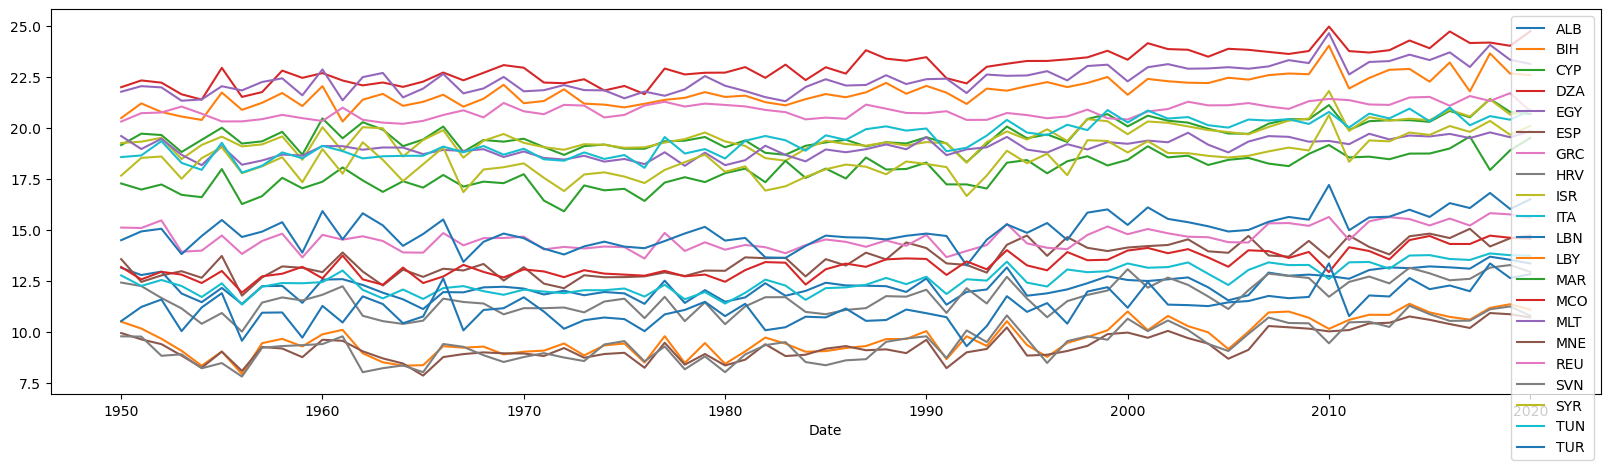

In [41]:
YAST.plot(figsize=(20,5))

Computed the average precipitation per annum for each country, save the results in a pandas data frame called YAPR, and display the data using a line plot.

In [43]:
df_MAPR = MAPR.reset_index()
df_MAPR

Date     ALB     BIH    CYP   DZA   EGY    ESP     GRC     HRV    ISR  \
0    1950-01   97.35   78.33  68.26  9.54  2.65  29.45   86.34   87.53  58.02   
1    1950-02   87.45   87.53  30.95  3.24  1.60  57.43   59.23   78.08  37.63   
2    1950-03   57.06   81.82  54.18  5.26  0.90  37.33   90.62   48.30  30.46   
3    1950-04  108.63   85.88  32.61  5.48  0.94  33.08   67.39   98.04   5.36   
4    1950-05   39.78   33.80  34.12  4.34  1.22  71.20   42.14   19.68   6.65   
..       ...     ...     ...    ...   ...   ...    ...     ...     ...    ...   
847  2020-08   57.18  119.86   0.70  1.41  0.13  28.52   34.55  125.63   1.72   
848  2020-09  113.53   85.74   1.62  4.49  0.22  41.17   52.62   94.17   1.32   
849  2020-10  185.30  147.62   2.31  1.36  0.50  70.78   47.51  171.13   1.06   
850  2020-11   12.27   34.98  97.35  4.55  2.76  71.89   35.34   42.62  43.54   
851  2020-12  201.66  177.84  74.32  6.36  1.01  74.47  154.60  166.63  27.34   

     ...   LBY    MAR     MCO     MLT     MNE     REU     SVN    SYR    TUN  \
0    ...  6.46  32.07   28.89  103.62  107.09  249.40   85.96  55.20  34.08   
1    ...  3.04   6.46  103.63   84.78  135.64  115.32   85.20  22.35  27.17   
2    ...  2.31  10.20   48.47   55.22   73.45  177.42   35.55  33.56  36.09   
3    ...  0.53  15.54   88.26   26.42  133.90  214.87  152.15  11.86  29.81   
4    ...  1.59  17.88   46.76    3.61   52.71   59.87   37.82  23.34  10.05   
..   ...   ...    ...     ...     ...     ...     ...     ...    ...    ...   
847  ...  0.14   7.29   46.20    0.06  104.04   29.79  169.70   0.56   1.86   
848  ...  0.64   9.75   40.38   41.36  166.97   60.85  132.45   0.66  42.23   
849  ...  0.67  16.97  157.41   24.67  254.84   88.19  159.77   0.35   7.51   
850  ...  4.57  27.29   24.54   76.79   10.70   50.35   40.67  40.72  23.43   
851  ...  1.91  23.20  152.93   89.80  291.74  106.41  182.33  22.35  22.66   

        TUR  
0    103.27  
1     44.62  
2     68.85  
3     46.07  
4    101.80  
..      ...  
847   13.42  
848   10.70  
849   23.49  
850   41.66  
851   48.52  

[852 rows x 22 columns]

In [44]:

from datetime import datetime
df_MAPR['Date']=pd.to_datetime(df_MAPR['Date'])
df_MAPR['Date']= df_MAPR['Date'].dt.strftime('%Y')
df_MAPR

Date     ALB     BIH    CYP   DZA   EGY    ESP     GRC     HRV    ISR  \
0    1950   97.35   78.33  68.26  9.54  2.65  29.45   86.34   87.53  58.02   
1    1950   87.45   87.53  30.95  3.24  1.60  57.43   59.23   78.08  37.63   
2    1950   57.06   81.82  54.18  5.26  0.90  37.33   90.62   48.30  30.46   
3    1950  108.63   85.88  32.61  5.48  0.94  33.08   67.39   98.04   5.36   
4    1950   39.78   33.80  34.12  4.34  1.22  71.20   42.14   19.68   6.65   
..    ...     ...     ...    ...   ...   ...    ...     ...     ...    ...   
847  2020   57.18  119.86   0.70  1.41  0.13  28.52   34.55  125.63   1.72   
848  2020  113.53   85.74   1.62  4.49  0.22  41.17   52.62   94.17   1.32   
849  2020  185.30  147.62   2.31  1.36  0.50  70.78   47.51  171.13   1.06   
850  2020   12.27   34.98  97.35  4.55  2.76  71.89   35.34   42.62  43.54   
851  2020  201.66  177.84  74.32  6.36  1.01  74.47  154.60  166.63  27.34   

     ...   LBY    MAR     MCO     MLT     MNE     REU     SVN    SYR    TUN  \
0    ...  6.46  32.07   28.89  103.62  107.09  249.40   85.96  55.20  34.08   
1    ...  3.04   6.46  103.63   84.78  135.64  115.32   85.20  22.35  27.17   
2    ...  2.31  10.20   48.47   55.22   73.45  177.42   35.55  33.56  36.09   
3    ...  0.53  15.54   88.26   26.42  133.90  214.87  152.15  11.86  29.81   
4    ...  1.59  17.88   46.76    3.61   52.71   59.87   37.82  23.34  10.05   
..   ...   ...    ...     ...     ...     ...     ...     ...    ...    ...   
847  ...  0.14   7.29   46.20    0.06  104.04   29.79  169.70   0.56   1.86   
848  ...  0.64   9.75   40.38   41.36  166.97   60.85  132.45   0.66  42.23   
849  ...  0.67  16.97  157.41   24.67  254.84   88.19  159.77   0.35   7.51   
850  ...  4.57  27.29   24.54   76.79   10.70   50.35   40.67  40.72  23.43   
851  ...  1.91  23.20  152.93   89.80  291.74  106.41  182.33  22.35  22.66   

        TUR  
0    103.27  
1     44.62  
2     68.85  
3     46.07  
4    101.80  
..      ...  
847   13.42  
848   10.70  
849   23.49  
850   41.66  
851   48.52  

[852 rows x 22 columns]

In [45]:
YAPR = df_MAPR.groupby(['Date']).mean()
YAPR

ALB         BIH        CYP       DZA       EGY        ESP  \
Date                                                                     
1950   86.312500   77.140833  27.428333  5.124167  1.388333  40.765000   
1951   90.470833   90.131667  39.098333  7.210833  0.821667  63.368333   
1952  111.735000  104.898333  33.905000  4.929167  1.270833  53.685833   
1953   75.555000   69.708333  37.766667  6.209167  1.474167  43.456667   
1954  100.989167   97.855000  48.532500  5.448333  0.938333  42.716667   
...          ...         ...        ...       ...       ...        ...   
2016  127.424167  106.807500  25.437500  5.246667  0.878333  58.745833   
2017   96.608333   98.728333  24.140833  4.842500  0.648333  41.400833   
2018  126.537500  109.419167  38.275833  7.445833  1.277500  69.156667   
2019  105.521667  105.437500  52.884167  5.945833  1.359167  51.941667   
2020   95.304167   91.222500  37.650833  4.230833  2.400833  56.407500   

            GRC         HRV        ISR        ITA  ...       LBY        MAR  \
Date                                               ...                        
1950  57.639167   73.246667  13.595000  68.172500  ...  1.610000  19.264167   
1951  67.120000   87.060833  16.129167  99.375833  ...  1.405833  22.827500   
1952  64.858333   92.911667  13.887500  71.389167  ...  1.304167  17.310833   
1953  66.325833   61.880833  27.568333  77.901667  ...  2.152500  23.172500   
1954  77.809167   82.370833  23.499167  81.296667  ...  1.526667  25.585833   
...         ...         ...        ...        ...  ...       ...        ...   
2016  64.165000   96.786667  18.518333  88.757500  ...  1.118333  23.389167   
2017  66.038333   90.944167  11.009167  70.900000  ...  2.489167  14.946667   
2018  75.761667   94.611667  25.376667  99.956667  ...  2.050000  33.396667   
2019  72.950000  101.130000  23.483333  96.911667  ...  2.329167  17.608333   
2020  61.387500   84.333333  25.045000  81.261667  ...  1.877500  17.729167   

             MCO        MLT         MNE         REU         SVN        SYR  \
Date                                                                         
1950   57.770833  40.722500  112.725833  135.336667   90.868333  15.086667   
1951   98.398333  38.282500  110.780833  115.220833   99.398333  15.694167   
1952   58.534167  21.989167  159.711667  133.290833  103.516667  16.039167   
1953   63.436667  41.865000   79.185000  123.334167   78.640833  23.260833   
1954   72.550000  46.435000  122.163333  112.034167   95.057500  23.267500   
...          ...        ...         ...         ...         ...        ...   
2016   79.346667  32.710000  152.777500  103.489167  117.884167  15.535833   
2017   53.524167  37.402500  121.100833   98.981667  115.371667  14.022500   
2018  112.834167  42.935833  144.320833  153.328333  109.058333  30.192500   
2019   95.307500  45.458333  135.440833   84.646667  118.467500  27.032500   
2020   68.465833  26.129167  125.401667  119.201667  104.747500  21.250833   

            TUN        TUR  
Date                        
1950  16.780000  50.032500  
1951  13.130000  62.815833  
1952  12.672500  53.745000  
1953  19.828333  61.848333  
1954  13.490000  63.615833  
...         ...        ...  
2016  15.634167  60.818333  
2017  16.927500  53.742500  
2018  17.461667  65.833333  
2019  19.375833  59.724167  
2020  15.683333  50.871667  

[71 rows x 21 columns]

<Axes: xlabel='Date'>

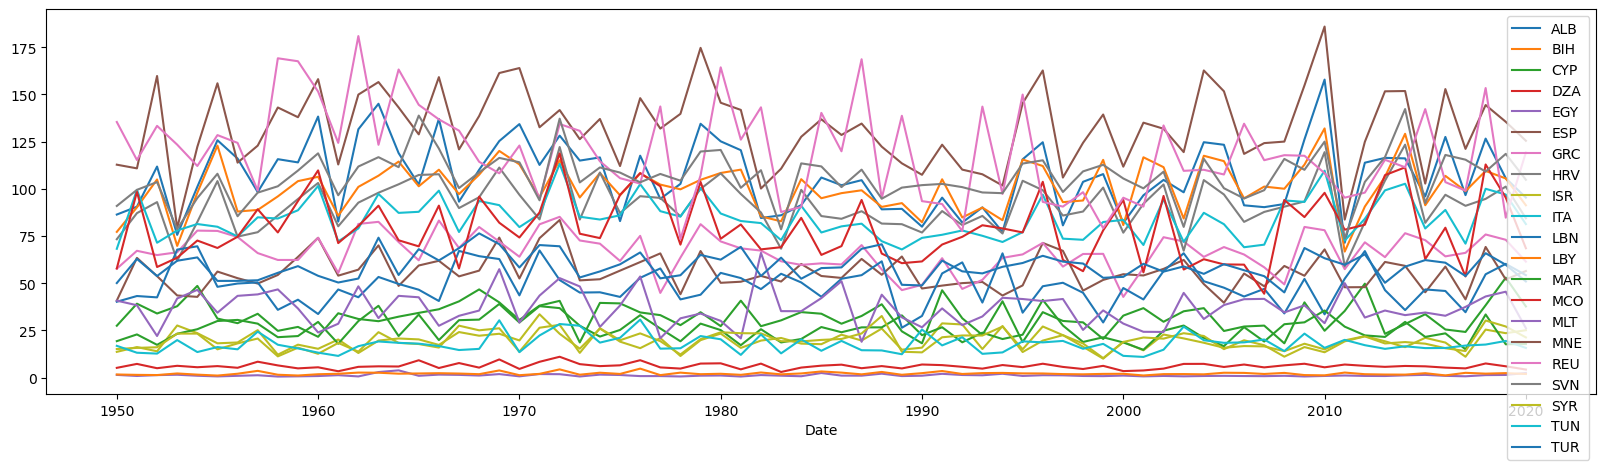

In [46]:
YAPR.plot(figsize=(20,5))

## Q2

For this question, you are going to use [yfinance](https://pypi.org/project/yfinance/) library to access [Yahoo! Finance Data](https://finance.yahoo.com/).

Using the `yfinance` library, obtain the stock prices of the following companies between January 1st, 2019 and December 31st, 2022: Alphabet (Google), Meta (Facebook), Cisco, Intel, AMD, Qualcomm, Apple, Samsung, Xiaomi, and Tesla.

1. Construct a pandas data frame `CHANGE` containing values of $-1$, $0$, or $1$ for each trading day within the specified time frame for each mentioned company. Assign a value of $0$ if the daily closing price change is within $\pm 2.5\%$ of the opening price. If the change is greater than $2.5\%$ of the opening price, assign a value of $1$. If the change is less than $-2.5\%$, assign a value of $-1$.
2. Identify the longest continuous time intervals during which the `CHANGE` consistently remains $1$ and $-1$ for each company.
3. Create another pandas data frame `DIFFERENCE` consisting of values $-1$, $0$, or $1$ for each day within the specified time period (excluding January 1st, 2019). If the opening price of a day is within $\pm 2.5\%$ of the previous day's opening price, assign a value of $0$. If the change in the opening price in comparison to the previous day is greater than $2.5\%$, assign a value of $1$. If the change in the opening price is less than $-2.5\%$, assign a value of $-1$.
4. Determine the longest continuous time intervals during which the `DIFFERENCE` consistently remains $1$ and $-1$ for each company.

In [26]:
!pip install --quiet  yfinance
import yfinance as yf


In [28]:

tickers = ["GOOG", "META", "CSCO", "INTC", "AMD", "QCOM", "AAPL", "005930.KS", "1810.HK", "TSLA"]
start_date = "2019-01-01"
end_date = "2022-12-31"
stock_data = yf.download(tickers, start=start_date, end=end_date)



[*********************100%%**********************]  10 of 10 completed


I checked the column names and filtered them to only 'Open' and 'Close' columns.

In [29]:
for col in stock_data.columns:
    print(col)


('Adj Close', '005930.KS')
('Adj Close', '1810.HK')
('Adj Close', 'AAPL')
('Adj Close', 'AMD')
('Adj Close', 'CSCO')
('Adj Close', 'GOOG')
('Adj Close', 'INTC')
('Adj Close', 'META')
('Adj Close', 'QCOM')
('Adj Close', 'TSLA')
('Close', '005930.KS')
('Close', '1810.HK')
('Close', 'AAPL')
('Close', 'AMD')
('Close', 'CSCO')
('Close', 'GOOG')
('Close', 'INTC')
('Close', 'META')
('Close', 'QCOM')
('Close', 'TSLA')
('High', '005930.KS')
('High', '1810.HK')
('High', 'AAPL')
('High', 'AMD')
('High', 'CSCO')
('High', 'GOOG')
('High', 'INTC')
('High', 'META')
('High', 'QCOM')
('High', 'TSLA')
('Low', '005930.KS')
('Low', '1810.HK')
('Low', 'AAPL')
('Low', 'AMD')
('Low', 'CSCO')
('Low', 'GOOG')
('Low', 'INTC')
('Low', 'META')
('Low', 'QCOM')
('Low', 'TSLA')
('Open', '005930.KS')
('Open', '1810.HK')
('Open', 'AAPL')
('Open', 'AMD')
('Open', 'CSCO')
('Open', 'GOOG')
('Open', 'INTC')
('Open', 'META')
('Open', 'QCOM')
('Open', 'TSLA')
('Volume', '005930.KS')
('Volume', '1810.HK')
('Volume', 'AAPL')


Changed the value type to float the get the accurate result.

In [30]:
stock_data_open = stock_data['Open'].astype(float)
stock_data_close = stock_data['Close'].astype(float)

In [31]:
stock_data_open=stock_data_open.fillna(0)
stock_data_close=stock_data_close.fillna(0)


In [32]:
stock_data_comp= stock_data_open.compare(stock_data_close,result_names=("open", "close"), keep_equal=True)
stock_data_comp

005930.KS          1810.HK               AAPL              \
                open    close    open  close        open       close   
Date                                                                   
2019-01-02   39400.0  38750.0   12.98  12.20   38.722500   39.480000   
2019-01-03   38300.0  37600.0   12.28  11.76   35.994999   35.547501   
2019-01-04   37450.0  37450.0   11.66  11.96   36.132500   37.064999   
2019-01-07   38000.0  38750.0   12.32  12.00   37.174999   36.982498   
2019-01-08   38000.0  38100.0   12.16  11.10   37.389999   37.687500   
...              ...      ...     ...    ...         ...         ...   
2022-12-26   58000.0  57900.0    0.00   0.00    0.000000    0.000000   
2022-12-27   58000.0  58100.0    0.00   0.00  131.380005  130.029999   
2022-12-28   57600.0  56600.0   11.06  11.22  129.669998  126.040001   
2022-12-29   56000.0  55300.0   10.96  10.86  127.989998  129.610001   
2022-12-30       0.0      0.0   11.04  10.94  128.410004  129.929993   

                  AMD                  CSCO                  GOOG             \
                 open      close       open      close       open      close   
Date                                                                           
2019-01-02  18.010000  18.830000  42.279999  42.950001  50.828499  52.292500   
2019-01-03  18.420000  17.049999  42.299999  41.070000  52.049999  50.803001   
2019-01-04  17.549999  19.000000  41.849998  42.919998  51.629501  53.535500   
2019-01-07  19.440001  20.570000  42.860001  43.209999  53.575001  53.419498   
2019-01-08  21.190001  20.750000  43.570000  43.560001  53.805500  53.813999   
...               ...        ...        ...        ...        ...        ...   
2022-12-26   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2022-12-27  63.869999  63.270000  47.669998  47.529999  89.309998  87.930000   
2022-12-28  62.540001  62.570000  47.689999  47.070000  87.500000  86.459999   
2022-12-29  63.639999  64.820000  47.259998  47.500000  87.029999  88.949997   
2022-12-30  63.770000  64.769997  47.270000  47.639999  87.364998  88.730003   

                 INTC                   META                    QCOM  \
                 open      close        open       close        open   
Date                                                                   
2019-01-02  45.959999  47.080002  128.990005  135.679993   56.200001   
2019-01-03  46.150002  44.490002  134.690002  131.740005   55.950001   
2019-01-04  45.840000  47.220001  134.009995  137.949997   56.500000   
2019-01-07  47.099998  47.439999  137.559998  138.050003   56.389999   
2019-01-08  47.799999  47.740002  139.889999  142.529999   56.709999   
...               ...        ...         ...         ...         ...   
2022-12-26   0.000000   0.000000    0.000000    0.000000    0.000000   
2022-12-27  25.850000  25.940001  117.930000  116.879997  109.750000   
2022-12-28  25.840000  25.540001  116.250000  115.620003  108.870003   
2022-12-29  25.770000  26.209999  116.400002  120.260002  108.349998   
2022-12-30  25.900000  26.430000  118.160004  120.339996  107.970001   

                              TSLA              
                 close        open       close  
Date                                            
2019-01-02   57.400002   20.406668   20.674667  
2019-01-03   55.700001   20.466667   20.024000  
2019-01-04   56.599998   20.400000   21.179333  
2019-01-07   56.439999   21.448000   22.330667  
2019-01-08   55.950001   22.797333   22.356667  
...                ...         ...         ...  
2022-12-26    0.000000    0.000000    0.000000  
2022-12-27  109.459999  117.500000  109.099998  
2022-12-28  106.970001  110.349998  112.709999  
2022-12-29  109.839996  120.389999  121.820000  
2022-12-30  109.940002  119.949997  123.180000  

[1039 rows x 20 columns]

Created a zero data frame to start with.

In [36]:
CHANGE = stock_data_open
CHANGE.iloc[:] = 0


Set choices -1 and 1 and 0 as default value. Created the conditions and set the values according to conditions.

In [35]:

choices = [-1, 1]

for ticker in tickers:
    conditions = [
    (stock_data_comp[ticker]['close'] < stock_data_comp[ticker]['open']*0.975), 
    (stock_data_comp[ticker]['close'] > stock_data_comp[ticker]['open']*1.025)]
    CHANGE[ticker] = np.select(conditions, choices, default=0)


CHANGE      

005930.KS  1810.HK  AAPL  AMD  CSCO  GOOG  INTC  META  QCOM  TSLA
Date                                                                         
2019-01-02          0       -1     0    1     0     1     0     1     0     0
2019-01-03          0       -1     0   -1    -1     0    -1     0     0     0
2019-01-04          0        1     1    1     1     1     1     1     0     1
2019-01-07          0       -1     0    1     0     0     0     0     0     1
2019-01-08          0       -1     0    0     0     0     0     0     0     0
...               ...      ...   ...  ...   ...   ...   ...   ...   ...   ...
2022-12-26          0        0     0    0     0     0     0     0     0     0
2022-12-27          0        0     0    0     0     0     0     0     0    -1
2022-12-28          0        0    -1    0     0     0     0     0     0     0
2022-12-29          0        0     0    0     0     0     0     1     0     0
2022-12-30          0        0     0    0     0     0     0     0     0     1

[1039 rows x 10 columns]